# Timeseries-Num: Plot raw and aggregated information

In [1]:
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### data

In [2]:
# load data
path = 'https://raw.githubusercontent.com/jmquintana79/utilsDS/master/scripts/datasets/data/dataset.weather.csv.gz'
data = pd.read_csv(path)
data['datetime'] = pd.to_datetime(data['datetime'])
# get categorical columns
cats = ['float']
cols_num = data.select_dtypes(include=cats).columns.tolist()
# collect only numerical columns
data = data.set_index("datetime")[cols_num]

# PLOT

In [57]:
col = cols_num[8]
df = data[[col]].copy()
col

'temperature (degC)'

In [58]:
# collect dt information
years = df.index.year.unique()
months = df.index.month.unique()
day_of_year = df.index.dayofweek.unique()
hours = df.index.hour.unique()
minutes = df.index.minute.unique()

In [59]:
from datetime import date, datetime

def raw_to_minutely(df, col):
    temp = df[[col]].copy()
    temp["date"] = df.index.to_series().apply(lambda x: datetime(x.year, x.month, x.day, x.hour, x.minute))
    temp = temp.groupby("date")[[col]].median()
    temp.index = pd.to_datetime(temp.index)
    return temp

def raw_to_hourly(df, col):
    temp = df[[col]].copy()
    temp["date"] = df.index.to_series().apply(lambda x: datetime(x.year, x.month, x.day, x.hour))
    temp = temp.groupby("date")[[col]].median()
    temp.index = pd.to_datetime(temp.index)
    return temp

def raw_to_daily(df, col):
    temp = df[[col]].copy()
    temp["date"] = df.index.date
    temp = temp.groupby("date")[[col]].median()
    temp.index = pd.to_datetime(temp.index)
    return temp

def raw_to_monthly(df, col):
    temp = df[[col]].copy()
    temp["date"] = temp.index.to_series().apply(lambda x: date(x.year, x.month, 1))
    temp = temp.groupby("date")[[col]].median()
    temp.index = pd.to_datetime(temp.index)
    return temp

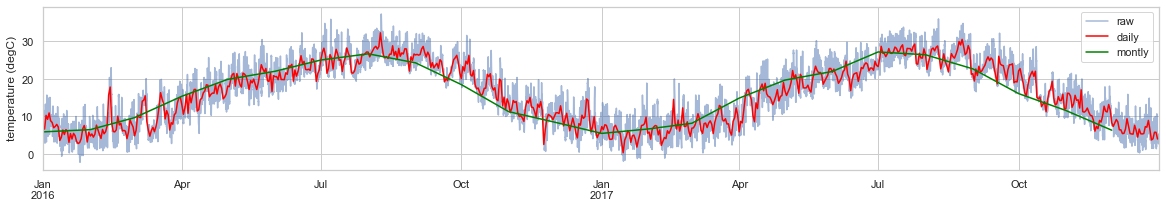

In [64]:


_, ax = plt.subplots(figsize = (20,3))
df.rename(columns = {col:"raw"}).plot(ax = ax, alpha = .5)
ax.legend(loc='best', fontsize=9,shadow=True)

# estimate temporal resolution
dt_resolution = df.index.resolution

if dt_resolution == "second":
    # minutely
    temp = raw_to_minutely(df, col)
    if len(temp.index.unique()) > 3:
        temp.rename(columns = {col:"minutely"}).plot(ax = ax, color = "grey")
if dt_resolution == "second" or dt_resolution == "minute":
    # hourly
    temp = raw_to_hourly(df, col)
    if len(temp.index.unique()) > 3:
        temp.rename(columns = {col:"hourly"}).plot(ax = ax, color = "yellow")
if dt_resolution == "second" or dt_resolution == 'minute' or dt_resolution == 'hour':
    # daily
    temp = raw_to_daily(df, col)
    if len(temp.index.unique()) > 3:
        temp.rename(columns = {col:"daily"}).plot(ax = ax, color = "red")
if dt_resolution == "second" or dt_resolution == 'minute' or dt_resolution == "hour" or dt_resolution == "day":
    # montly
    temp = raw_to_monthly(df, col)
    if len(temp.index.unique()) > 3:
        temp.rename(columns = {col:"montly"}).plot(ax = ax, color = "green")

ax.set_ylabel(col)
ax.set_xlabel(None)
plt.show()

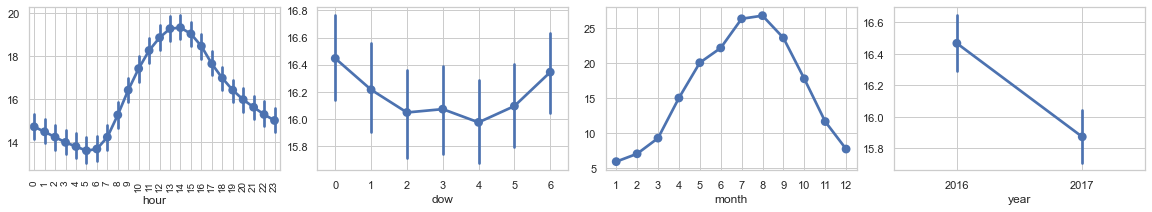

In [61]:
_, (ax1,ax2,ax3,ax4) = plt.subplots(ncols = 4, figsize = (20,3))
temp = df[[col]].copy()
temp["hour"] = temp.index.hour
temp["dow"] = temp.index.dayofweek
temp["month"] = temp.index.month
temp["year"] = temp.index.year
ax1 = sns.pointplot(data=temp, x="hour", y=col, errorbar="sd", ax = ax1)
ax2 = sns.pointplot(data=temp, x="dow", y=col, errorbar="sd", ax = ax2)
ax3 = sns.pointplot(data=temp, x="month", y=col, errorbar="sd", ax = ax3)
ax4 = sns.pointplot(data=temp, x="year", y=col, errorbar="sd", ax = ax4)
ax1.set_xticklabels(np.arange(24), rotation=90,fontsize='small')
ax1.set_ylabel(None)
ax2.set_ylabel(None)
ax3.set_ylabel(None)
ax4.set_ylabel(None)
plt.subplots_adjust(wspace = 0.15)
ax1.xaxis.grid(True)
ax2.xaxis.grid(True)
ax3.xaxis.grid(True)
ax4.xaxis.grid(True)
plt.show()